# Correlation and applying PCA | Big Data Analytics | 110118055

## Part 4 - i) PCA Attributes with 7.

#### Importing the numpy, pandas, warning, matplotlib, seaborn, sklearn, math libraries.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from math import sqrt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

#### importing the dataset from our saved files.

In [2]:
df_test = pd.read_csv(r"C:\Users\Nachiket Sanjay\Desktop\Semester 5\Sent files\winequality_test.csv")
df_train = pd.read_csv(r"C:\Users\Nachiket Sanjay\Desktop\Semester 5\BDA Assignment\winequality_train.csv")

In [3]:
x_training = df_train.iloc[:,0:11].values
y_training = df_train.iloc[:,11].values
x_testing = df_test.iloc[:,0:11].values
y_testing = df_test.iloc[:,11].values

### Standardizing the Data

In [4]:
sc = StandardScaler()                        
x_training = sc.fit_transform(x_training) 
x_testing = sc.fit_transform(x_testing)     

In [5]:
pca = PCA(n_components = 7)                  
x_training = pca.fit_transform(x_training)   
x_testing = pca.fit_transform(x_testing)     

In [6]:
explained_variance = pca.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.30839061 0.17108555 0.13182913 0.10825371 0.08509921 0.06460629
 0.0472146 ]


In [7]:
df_train['good_quality'] = ['good' if x >= 7 else 'bad' for x in df_train['Quality']]
df_test['good_quality'] = ['good' if x >= 7 else 'bad' for x in df_test['Quality']]

pca_training = pd.DataFrame(data = x_training, 
                     columns = ['principal component 1', 'principal component 2','principal component 3',
                                'principal component 4','principal component 5','principal component 6',
                                'principal component 7'])
new_training = pd.concat([pca_training, df_train[['good_quality']]], axis = 1)

new_training.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,good_quality
0,4.768382,1.923184,-0.003647,-1.992963,7.224575,-1.174000,2.262501,bad
1,1.964976,-2.646545,0.486005,0.617843,0.423220,-0.274104,-0.313153,good
2,3.972563,-1.254631,-0.685747,2.286786,-0.556683,-0.542241,0.081891,bad
3,4.010193,-1.249630,-0.603643,2.326057,-0.572221,-0.568189,0.057648,bad
4,2.614843,-2.445038,0.223538,-0.300324,1.731593,1.695399,-0.886627,bad


In [8]:
pca_test = pd.DataFrame(data = x_testing, 
                     columns = ['principal component 1', 'principal component 2','principal component 3',
                                'principal component 4','principal component 5','principal component 6',
                                'principal component 7'])
new_test = pd.concat([pca_test, df_test[['good_quality']]], axis = 1)

new_test.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,good_quality
0,-1.917354,-0.835509,-0.009457,-1.201869,0.446615,0.348290,0.401064,bad
1,-1.469929,1.180496,0.180667,-1.013970,0.695222,-1.361300,0.246220,bad
2,-1.244417,0.107924,0.294780,-0.877027,0.497362,-0.739579,0.167344,bad
3,1.813822,-0.145117,-0.314150,0.118876,-1.853949,-0.064427,-0.269529,bad
4,-1.917354,-0.835509,-0.009457,-1.201869,0.446615,0.348290,0.401064,bad


In [9]:
xnew_train = pca_training.iloc[:,:-1].values
ynew_train = pca_training.iloc[:,-1].values

xnew_test = pca_test.iloc[:,:-1].values
ynew_test = pca_test.iloc[:,-1].values

##### there are no null values in our dataset, hence we can proceed further with the representation of the dataset by plotting and start classification of the data.

#### Target variable - "Quality", we will start classifying the target variable with the help of the seaborn library.


Countplot for the Quality attribute in the training dataset.

6    462
5    448
7    150
4     37
8     13
3      9
Name: Quality, dtype: int64

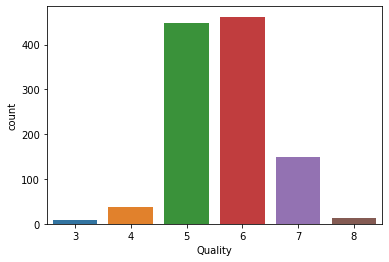

In [10]:
sns.countplot(df_train['Quality'])
df_train['Quality'].value_counts()

### For the training dataset, the Quality index of 6 is the greatest, followed by 5,7,4,8 and 3.

Countplot for Quality attribute in the test dataset.

5    233
6    176
7     49
4     16
8      5
3      1
Name: Quality, dtype: int64

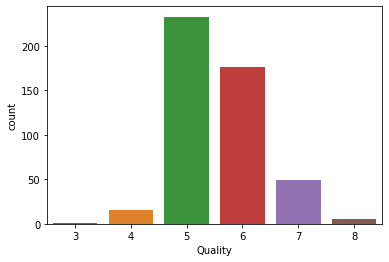

In [11]:
sns.countplot(df_test['Quality'])
df_test['Quality'].value_counts()

### From the above countplot table, we find that the Quality for 5 is the greatest, preceded by 6,7,4,8 and finally 3. 

In [12]:
bins = (0, 6, 10)
group_names = ['bad', 'good']
df_train['Quality'] = pd.cut(df_train['Quality'], bins = bins, labels = group_names)

In [13]:
bins = (0, 6, 10)
group_names = ['bad', 'good']
df_test['Quality'] = pd.cut(df_test['Quality'], bins = bins, labels = group_names)

In [14]:
label_quality = LabelEncoder()
df_train['Quality'] = label_quality.fit_transform(df_train['Quality'])
df_test['Quality'] = label_quality.fit_transform(df_test['Quality'])

# Logistic Regression as a Classifier

# a) Defining Logistic Regression and fitting the data

In [15]:
logreg = LogReg()

In [16]:
logreg.fit(x_training, y_training)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
logisticPrediction = logreg.predict(x_testing)
logisticPrediction

array([6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 3, 6, 6, 6, 6, 7, 5, 5, 6, 7, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6,
       6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6,
       5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 7, 7, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5, 5, 5,
       5, 5, 6, 5, 6, 7, 5, 6, 5, 6, 5, 6, 6, 6, 6,

### Confusion Matrix and Classification Report for Logistic Regression

In [21]:
# feeding the training set into the model
logreg.fit(x_training, y_training)

# predicting the results for the test set
y_pred_log = logreg.predict(x_testing)

# calculating the training and testing accuracies
print("Training accuracy :", logreg.score(x_training, y_training))
print("Testing accuracy :", logreg.score(x_testing, y_testing))


Training accuracy : 0.5969615728328865
Testing accuracy : 0.4354166666666667


In [22]:
print('Classification Report of Logistic Regression: \n')
print(classification_report(y_testing, y_pred_log))

# confusion matrix
print('Confusion Matrix: \n')
c1= confusion_matrix(y_testing, y_pred_log)
print(c1)

Classification Report of Logistic Regression: 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.56      0.38      0.45       233
           6       0.39      0.68      0.49       176
           7       0.12      0.02      0.04        49
           8       0.00      0.00      0.00         5

    accuracy                           0.44       480
   macro avg       0.18      0.18      0.16       480
weighted avg       0.43      0.44      0.40       480

Confusion Matrix: 

[[  0   0   1   0   0   0]
 [  0   0   4  11   1   0]
 [  2   0  88 139   4   0]
 [  1   2  51 120   2   0]
 [  0   0  12  36   1   0]
 [  0   0   0   5   0   0]]


C:\Users\Nachiket Sanjay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Accuracy Score for Logistic Regression Classifier

In [23]:
accuracy_score(y_testing, logisticPrediction)

0.4354166666666667

***

# b) Linear Regression as a Classifier

In [24]:
lr = LinearRegression()
lr.fit(x_training, y_training)
linear_predict = lr.predict(x_testing)
linear_predict

array([5.84456158, 5.3427008 , 5.6764418 , 5.58409249, 5.84456158,
       5.76895982, 5.69728358, 6.07035798, 6.03911197, 4.87769787,
       5.71409829, 4.87769787, 5.8142105 , 6.06768339, 4.11830063,
       4.10185505, 5.0059478 , 6.20923356, 5.76039179, 6.14313344,
       5.34797332, 5.3049322 , 6.03483617, 5.73192799, 5.60809743,
       6.1153515 , 6.28872835, 6.03483617, 5.80660682, 6.11662941,
       5.5071755 , 5.65105007, 5.32043669, 3.8159034 , 5.89207216,
       5.68547962, 6.19279321, 5.87844117, 6.45018828, 5.12204029,
       5.12204029, 5.58389949, 6.53407634, 6.01907146, 6.18474811,
       5.99415165, 5.18519089, 5.99546181, 6.26736707, 5.64495409,
       6.16094964, 6.11310445, 6.18230901, 4.82599907, 5.2061976 ,
       5.26338687, 6.08436892, 4.14681167, 5.58214033, 5.86691763,
       5.52248806, 5.31461873, 5.90266527, 5.75331198, 6.00871565,
       6.00871565, 5.9323129 , 6.24968003, 5.3853398 , 6.13148246,
       5.86649433, 5.41790255, 5.42602226, 5.80878581, 5.11659

In [25]:
model_linear = LinearRegression()
model_linear.fit(x_training, y_training)

y_pred_linear = model_linear.predict(x_testing)
for i in range(480):
    if (y_pred_linear[i] > 5):
        y_pred_linear[i]=1
    else:
        y_pred_linear[i]=0
        
    


# calculating the training and testing accuracies
print("Training accuracy :", model_linear.score(x_training, y_training))
print("Testing accuracy :", model_linear.score(x_testing, y_testing))

Training accuracy : 0.3712160019790042
Testing accuracy : -0.21073760808232023


### Confusion Matrix and Classification Report for Linear Regression

In [26]:
print('Classification Report of Linear Regression: \n')
print(classification_report(y_testing, y_pred_linear))

print('Confusion Matrix: \n')
c2= confusion_matrix(y_testing, y_pred_log)
print(c2)

Classification Report of Linear Regression: 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       0.0
         3.0       0.00      0.00      0.00       1.0
         4.0       0.00      0.00      0.00      16.0
         5.0       0.00      0.00      0.00     233.0
         6.0       0.00      0.00      0.00     176.0
         7.0       0.00      0.00      0.00      49.0
         8.0       0.00      0.00      0.00       5.0

    accuracy                           0.00     480.0
   macro avg       0.00      0.00      0.00     480.0
weighted avg       0.00      0.00      0.00     480.0

Confusion Matrix: 

[[  0   0   1   0   0   0]
 [  0   0   4  11   1   0]
 [  2   0  88 139   4   0]
 [  1   2  51 120   2   0]
 [  0   0  12  36   1   0]
 [  0   0   0   5   0   0]]


C:\Users\Nachiket Sanjay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nachiket Sanjay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***

# c) SVM Classifier

In [27]:
svc = svm.SVC()
svc.fit(x_training, y_training)
pred_svc = svc.predict(x_testing)

In [28]:
model_svmclass = SVC()
sc = StandardScaler()
x_train = sc.fit_transform(x_training)
new_test = sc.fit_transform(x_testing)

model_svmclass.fit(x_training, y_training)
y_pred_svm = model_svmclass.predict(new_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svmclass.score(x_training, y_training))
print("Testing accuracy :", model_svmclass.score(new_test, y_testing))

Training accuracy : 0.6648793565683646
Testing accuracy : 0.4479166666666667


### Confusion Matrix and Classification Report for SVM (Support Vector Machine)

In [29]:
print('Classification Report of SVM: \n')
print(classification_report(y_testing, y_pred_svm))

print('Confusion Matrix: \n')
c3= confusion_matrix(y_testing, y_pred_svm)
print(c3)

Classification Report of SVM: 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.57      0.35      0.44       233
           6       0.40      0.76      0.52       176
           7       0.00      0.00      0.00        49
           8       0.00      0.00      0.00         5

    accuracy                           0.45       480
   macro avg       0.16      0.18      0.16       480
weighted avg       0.42      0.45      0.40       480

Confusion Matrix: 

[[  0   0   1   0   0   0]
 [  0   0   6  10   0   0]
 [  0   0  82 151   0   0]
 [  0   0  43 133   0   0]
 [  0   0  11  38   0   0]
 [  0   0   1   4   0   0]]


C:\Users\Nachiket Sanjay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
accuracy_score(y_testing, pred_svc)

0.45625

From the above Calculations we can classify that the accuracy score for SVM Model Classifier is precises since the accuracy score for testing and the predicted data for the SVM is the same.(Close)

***

# d) Naive Bayesian Classifier

In [31]:
model = GaussianNB()
model.fit(x_training,y_training)
pred_naive_bayes = model.predict(x_testing)

In [32]:
# feeding the training set into the model
model.fit(x_training, y_training)

# predicting the results for the test set
y_pred_naive = model.predict(x_testing)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_training, y_training))
print("Testing accuracy :", model.score(x_testing, y_testing))

Training accuracy : 0.5978552278820375
Testing accuracy : 0.4395833333333333


### Confusion Matrix and Classification Report for Naive Bayesian

In [33]:
print('Classification Report of Naive Bayesian: \n')
print(classification_report(y_testing, y_pred_naive))

print('Confusion Matrix: \n')
c4= confusion_matrix(y_testing, y_pred_naive)
print(c4)

Classification Report of Naive Bayesian: 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.57      0.37      0.45       233
           6       0.38      0.70      0.50       176
           7       0.00      0.00      0.00        49
           8       0.00      0.00      0.00         5

    accuracy                           0.44       480
   macro avg       0.16      0.18      0.16       480
weighted avg       0.42      0.44      0.40       480

Confusion Matrix: 

[[  0   0   1   0   0   0]
 [  0   0   6  10   0   0]
 [  0   0  87 146   0   0]
 [  3   0  49 124   0   0]
 [  0   0   9  40   0   0]
 [  0   0   1   4   0   0]]


C:\Users\Nachiket Sanjay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
accuracy_score(y_testing, pred_naive_bayes)

0.4395833333333333

From the above Calculations we can classify that the accuracy score for Naive Bayesian is precises since the accuracy score for testing and the predicted data for the Naive Bayesian is same.

***

# ----------------------------------------------------------------------------------------------------------

***

# <font color=red> Done by: Nachiket Sanjay | Roll Number: 110118055 | Big Data Analytics Assignment - CSOE17</font> 

# Observations:
### Correlation values with respect to Quality.

###### We print the correlation dataset with respect to Quality and draw the bar graph for the correlation dataset for the training dataset.

Quality                 1.000000
Alcohol                 0.417850
Sulphates               0.250929
Citric Acid             0.231788
Fixed Acidity           0.081570
Residual Sugar          0.027563
Free Sulfur Dioxide    -0.058847
pH                     -0.059827
Total Sulfur Dioxide   -0.121124
Chlorides              -0.123547
Density                -0.220214
Volatile Acidity       -0.318048
Name: Quality, dtype: float64


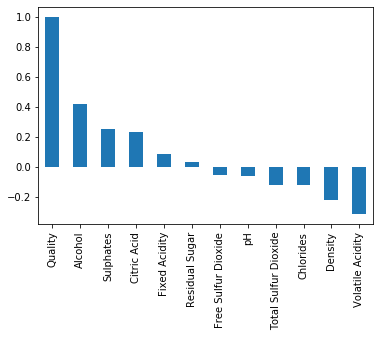

In [35]:
correlations = df_train.corr()['Quality'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind = "bar")

###### We print the correlation dataset with respect to Quality and draw the bar graph for the correlation dataset for the testing dataset.

Quality                 1.000000
Alcohol                 0.376987
Fixed Acidity           0.231691
Citric Acid             0.199176
Sulphates               0.151301
Residual Sugar          0.111019
Density                 0.080337
Chlorides              -0.052386
pH                     -0.062888
Free Sulfur Dioxide    -0.117547
Volatile Acidity       -0.142144
Total Sulfur Dioxide   -0.172831
Name: Quality, dtype: float64


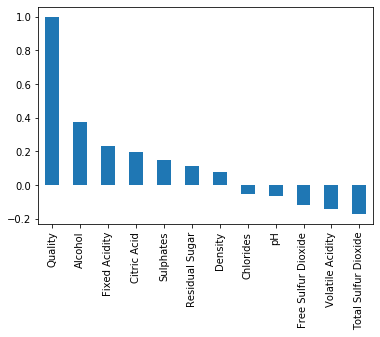

In [36]:
correlations = df_test.corr()['Quality'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind = "bar")

## Heatmap for attributes in respect of Quality for training and testing dataset.

Quality                  True
Alcohol                  True
Fixed Acidity            True
Citric Acid             False
Sulphates               False
Residual Sugar          False
Density                 False
Chlorides               False
pH                      False
Free Sulfur Dioxide     False
Volatile Acidity        False
Total Sulfur Dioxide    False
Name: Quality, dtype: bool


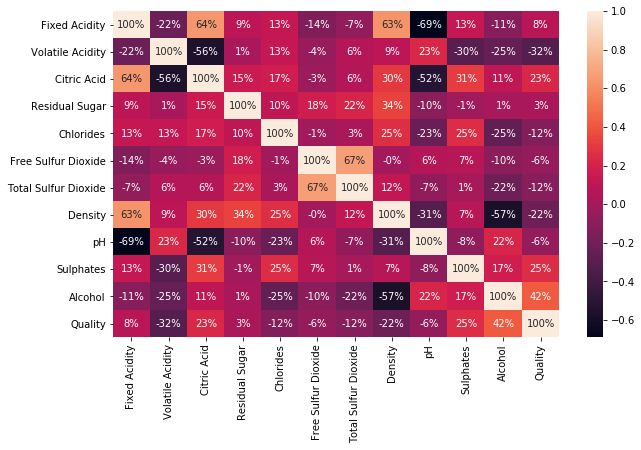

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(), annot=True, fmt='.0%')
print(abs(correlations) > 0.2)

Quality                  True
Alcohol                  True
Fixed Acidity            True
Citric Acid             False
Sulphates               False
Residual Sugar          False
Density                 False
Chlorides               False
pH                      False
Free Sulfur Dioxide     False
Volatile Acidity        False
Total Sulfur Dioxide    False
Name: Quality, dtype: bool


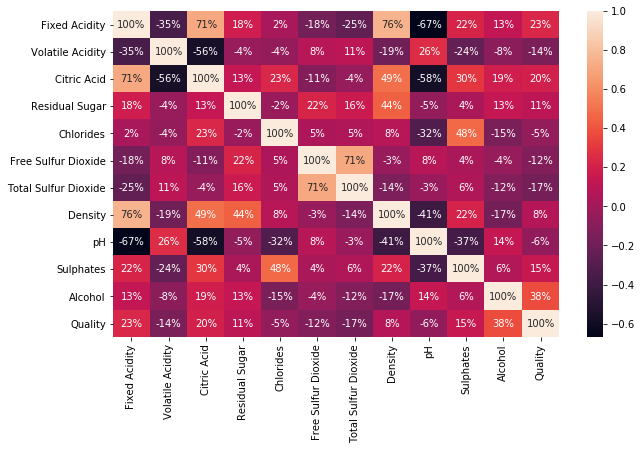

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df_test.corr(), annot=True, fmt='.0%')
print(abs(correlations) > 0.2)

***

### Legends for the terms used in the dataset:

fixed acidity: :most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines.

residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

chlorides: the amount of salt in the wine.

free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

density: the density of wine is close to that of water depending on the percent alcohol and sugar content.

pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

alcohol: the percent alcohol content of the wine.

quality: output variable (based on sensory data, score between 0 and 10)

***

### Plotting the barplot in respect to Quality for the training dataset for observational purposes:

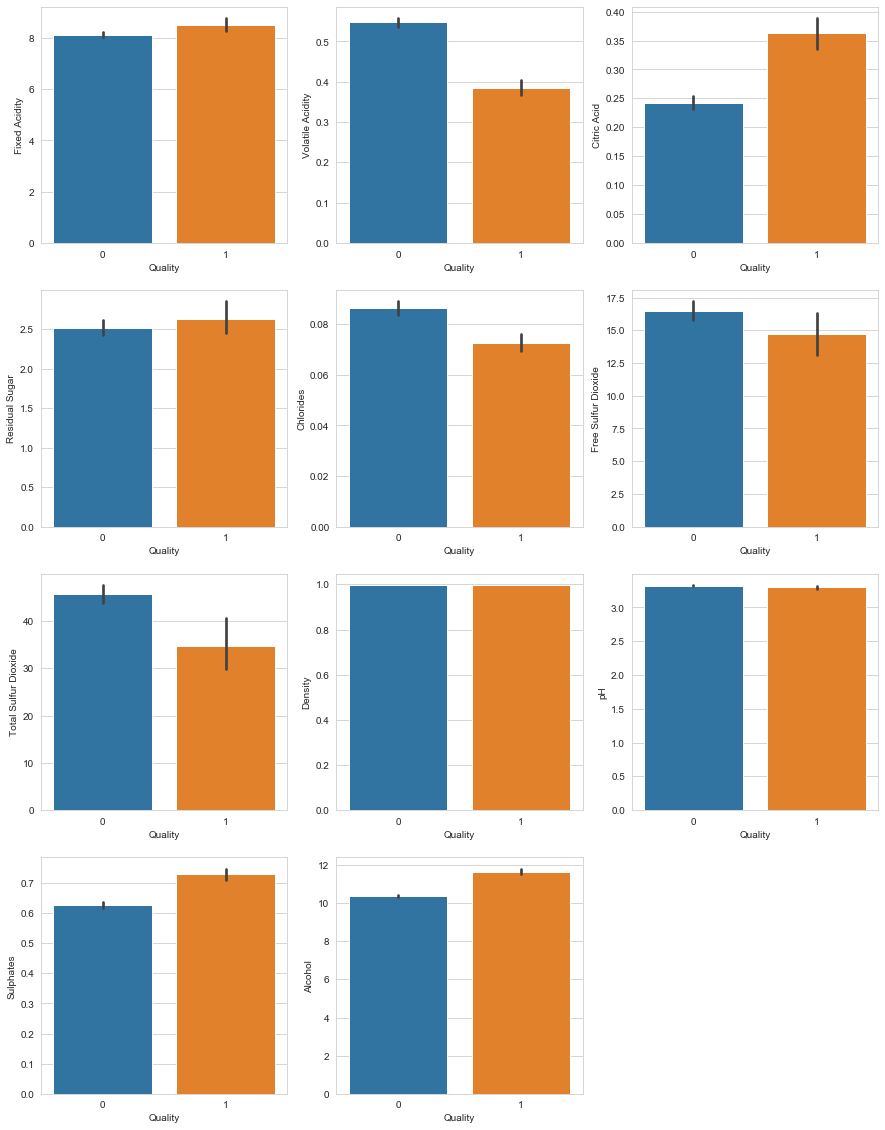

In [39]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.barplot(data = df_train, x = 'Quality', y = col)
    cnt+=1
plt.show() 

### Plotting the barplot in respect to Quality for the testing dataset for observational purposes:

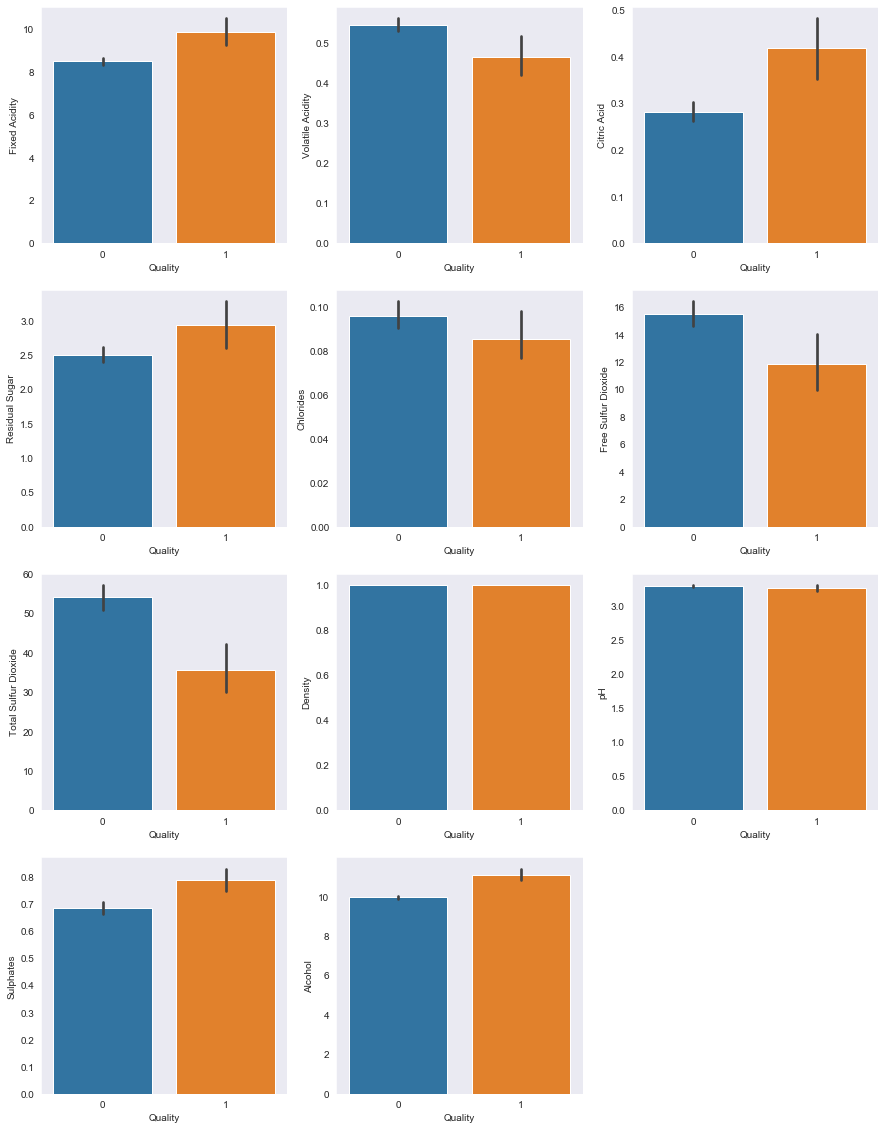

In [40]:
sns.set_style("dark")
fig = plt.figure(figsize = [15,20])
cols = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.barplot(data = df_test, x = 'Quality', y = col)
    cnt+=1
plt.show() 